In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


In [3]:
NUM_WORDS = 10000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i,word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

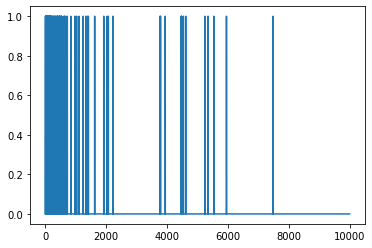

In [4]:
plt.plot(train_data[0])

In [6]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 5s - loss: 0.4629 - acc: 0.8144 - binary_crossentropy: 0.4629 - val_loss: 0.3320 - val_acc: 0.8766 - val_binary_crossentropy: 0.3320
Epoch 2/20
 - 4s - loss: 0.2471 - acc: 0.9120 - binary_crossentropy: 0.2471 - val_loss: 0.2864 - val_acc: 0.8868 - val_binary_crossentropy: 0.2864
Epoch 3/20
 - 4s - loss: 0.1846 - acc: 0.9352 - binary_crossentropy: 0.1846 - val_loss: 0.2900 - val_acc: 0.8842 - val_binary_crossentropy: 0.2900
Epoch 4/20
 - 4s - loss: 0.1509 - acc: 0.9488 - binary_crossentropy: 0.1509 - val_loss: 0.3151 - val_acc: 0.8757 - val_binary_crossentropy: 0.3151
Epoch 5/20
 - 4s - loss: 0.1253 - acc: 0.9586 - binary_crossentropy: 0.1253 - val_loss: 0.3315 - val_acc: 0.8746 - val_binary_crossentropy: 0.3315
Epoch 6/20
 - 4s - loss: 0.1047 - acc: 0.9678 - binary_crossentropy: 0.1047 - val_loss: 0.3598 - val_acc: 0.8704 - val_binary_crossentropy: 0.3598
Epoch 7/20
 - 4s - l

In [8]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [9]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6204 - acc: 0.6972 - binary_crossentropy: 0.6204 - val_loss: 0.5207 - val_acc: 0.8436 - val_binary_crossentropy: 0.5207
Epoch 2/20
 - 4s - loss: 0.4240 - acc: 0.8738 - binary_crossentropy: 0.4240 - val_loss: 0.3850 - val_acc: 0.8729 - val_binary_crossentropy: 0.3850
Epoch 3/20
 - 4s - loss: 0.3101 - acc: 0.8999 - binary_crossentropy: 0.3101 - val_loss: 0.3240 - val_acc: 0.8809 - val_binary_crossentropy: 0.3240
Epoch 4/20
 - 3s - loss: 0.2502 - acc: 0.9170 - binary_crossentropy: 0.2502 - val_loss: 0.2957 - val_acc: 0.8866 - val_binary_crossentropy: 0.2957
Epoch 5/20
 - 3s - loss: 0.2131 - acc: 0.9284 - binary_crossentropy: 0.2131 - val_loss: 0.2842 - val_acc: 0.8888 - val_binary_crossentropy: 0.2842
Epoch 6/20
 - 3s - loss: 0.1877 - acc: 0.9365 - binary_crossentropy: 0.1877 - val_loss: 0.2805 - val_acc: 0.8889 - val_binary_crossentropy: 0.2805
Epoch 7/20
 - 3s - loss: 0.1674 - acc: 0.9446 - binary_crossentropy:

In [10]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [11]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 12s - loss: 0.3407 - acc: 0.8551 - binary_crossentropy: 0.3407 - val_loss: 0.3000 - val_acc: 0.8777 - val_binary_crossentropy: 0.3000
Epoch 2/20
 - 12s - loss: 0.1454 - acc: 0.9472 - binary_crossentropy: 0.1454 - val_loss: 0.3373 - val_acc: 0.8696 - val_binary_crossentropy: 0.3373
Epoch 3/20
 - 12s - loss: 0.0504 - acc: 0.9848 - binary_crossentropy: 0.0504 - val_loss: 0.4546 - val_acc: 0.8651 - val_binary_crossentropy: 0.4546
Epoch 4/20
 - 11s - loss: 0.0082 - acc: 0.9986 - binary_crossentropy: 0.0082 - val_loss: 0.6014 - val_acc: 0.8650 - val_binary_crossentropy: 0.6014
Epoch 5/20
 - 11s - loss: 0.0015 - acc: 0.9999 - binary_crossentropy: 0.0015 - val_loss: 0.6790 - val_acc: 0.8680 - val_binary_crossentropy: 0.6790
Epoch 6/20
 - 11s - loss: 9.4963e-04 - acc: 1.0000 - binary_crossentropy: 9.4963e-04 - val_loss: 0.7134 - val_acc: 0.8701 - val_binary_crossentropy: 0.7134
Epoch 7/20
 - 11s - loss: 7.9953e-04 - acc: 1.0000 - b

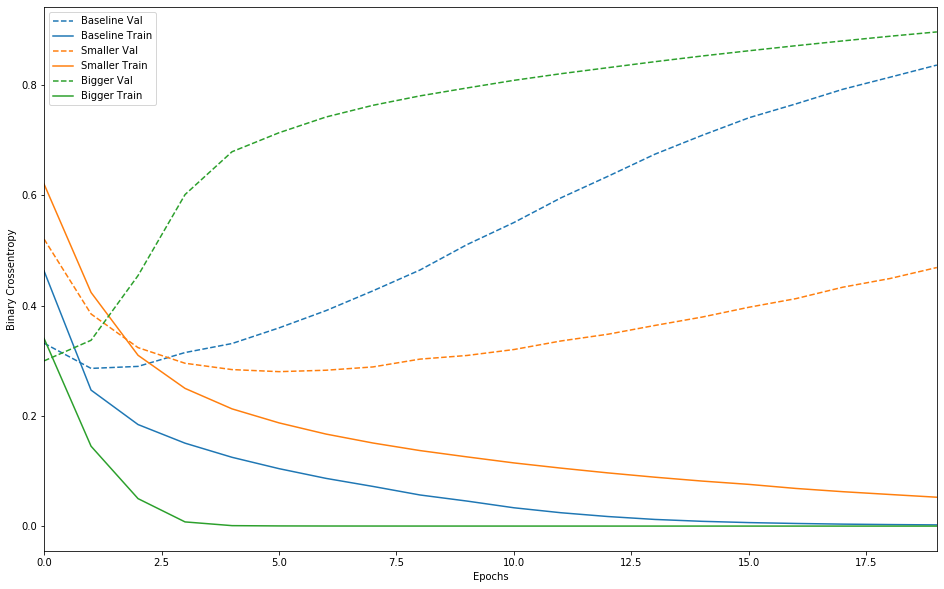

In [12]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])


In [13]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5224 - acc: 0.8084 - binary_crossentropy: 0.4817 - val_loss: 0.3817 - val_acc: 0.8746 - val_binary_crossentropy: 0.3403
Epoch 2/20
 - 4s - loss: 0.3039 - acc: 0.9093 - binary_crossentropy: 0.2591 - val_loss: 0.3356 - val_acc: 0.8863 - val_binary_crossentropy: 0.2881
Epoch 3/20
 - 4s - loss: 0.2511 - acc: 0.9296 - binary_crossentropy: 0.2012 - val_loss: 0.3361 - val_acc: 0.8852 - val_binary_crossentropy: 0.2845
Epoch 4/20
 - 4s - loss: 0.2279 - acc: 0.9404 - binary_crossentropy: 0.1746 - val_loss: 0.3509 - val_acc: 0.8809 - val_binary_crossentropy: 0.2963
Epoch 5/20
 - 4s - loss: 0.2125 - acc: 0.9480 - binary_crossentropy: 0.1568 - val_loss: 0.3625 - val_acc: 0.8787 - val_binary_crossentropy: 0.3058
Epoch 6/20
 - 4s - loss: 0.2009 - acc: 0.9530 - binary_crossentropy: 0.1433 - val_loss: 0.3731 - val_acc: 0.8768 - val_binary_crossentropy: 0.3149
Epoch 7/20
 - 4s - loss: 0.1934 - acc: 0.9560 - binary_crossentropy:

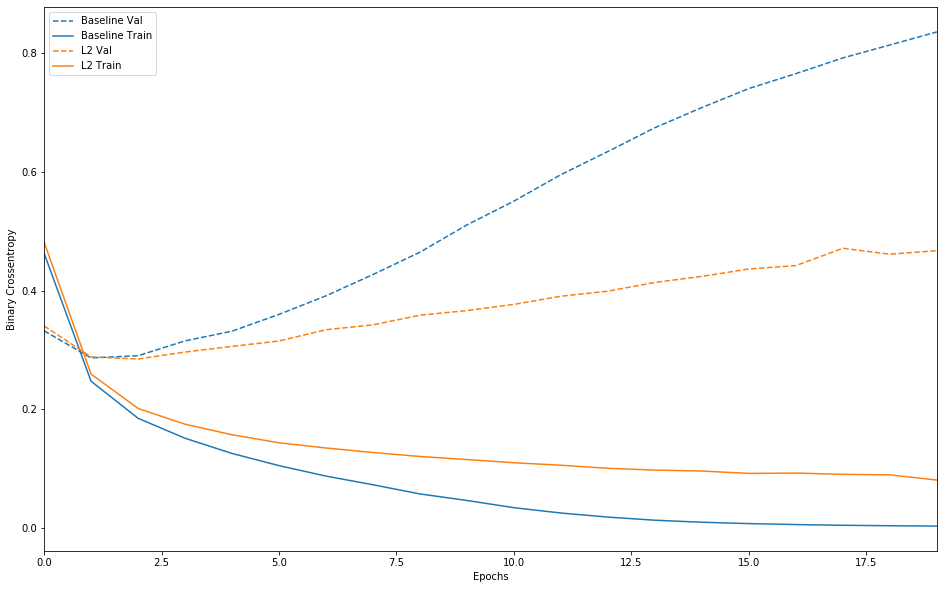

In [14]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])


In [15]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6026 - acc: 0.6758 - binary_crossentropy: 0.6026 - val_loss: 0.4403 - val_acc: 0.8628 - val_binary_crossentropy: 0.4403
Epoch 2/20
 - 4s - loss: 0.4236 - acc: 0.8270 - binary_crossentropy: 0.4236 - val_loss: 0.3166 - val_acc: 0.8830 - val_binary_crossentropy: 0.3166
Epoch 3/20
 - 4s - loss: 0.3375 - acc: 0.8759 - binary_crossentropy: 0.3375 - val_loss: 0.2869 - val_acc: 0.8876 - val_binary_crossentropy: 0.2869
Epoch 4/20
 - 4s - loss: 0.2821 - acc: 0.9026 - binary_crossentropy: 0.2821 - val_loss: 0.2734 - val_acc: 0.8893 - val_binary_crossentropy: 0.2734
Epoch 5/20
 - 4s - loss: 0.2419 - acc: 0.9206 - binary_crossentropy: 0.2419 - val_loss: 0.2748 - val_acc: 0.8881 - val_binary_crossentropy: 0.2748
Epoch 6/20
 - 4s - loss: 0.2157 - acc: 0.9300 - binary_crossentropy: 0.2157 - val_loss: 0.2956 - val

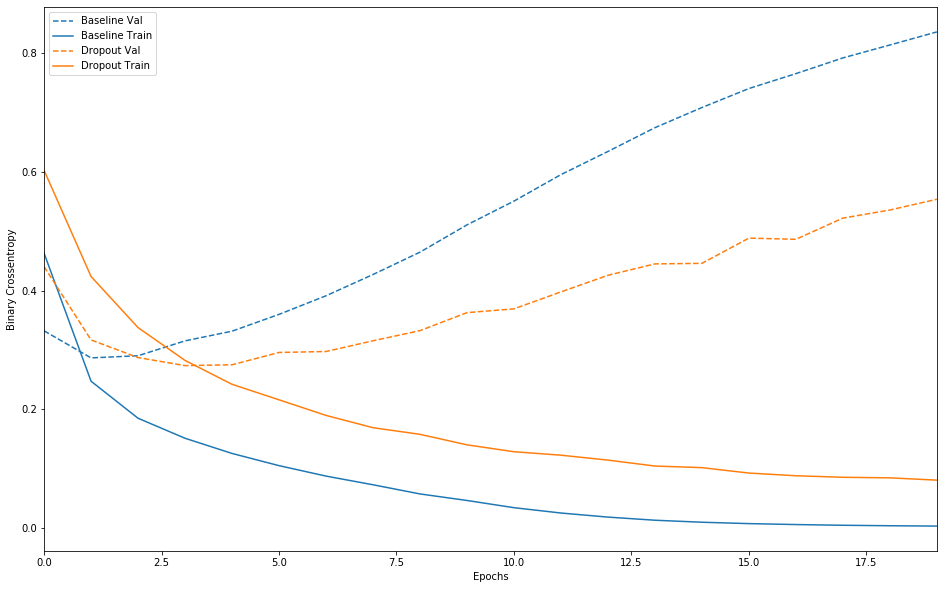

In [16]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])
